# [How to train an object detection model easy for free](https://www.dlology.com/blog/how-to-train-an-object-detection-model-easy-for-free/) | DLology Blog

In [1]:
dataset_name = 'tfcolab_dataset'
python_command = "python"

import sys
print("Python " + sys.version + "\n")

import tensorflow as tf
print("TensorFlow " + tf.__version__ + "\n")

import os
project_folder_path = os.getcwd()
print(project_folder_path)

Python 3.6.8 (default, Oct  7 2019, 12:59:55) 
[GCC 8.3.0]

TensorFlow 1.15.0

/home/oceanus/Notebook


In [27]:
# Number of training steps.
#num_steps = 1000  # 200000
num_steps = 200

# Number of evaluation steps.
num_eval_steps = 25  # 50

# batch size, originally 12, apparently fits to GPU memory better
# the config files actually fix this to 24?
batch_size = 12

# If you forked the repository, you can replace the link.
# watch out for branches..
repo_url = 'https://github.com/Tony607/object_detection_demo'  # dataset is "placed" by this notebook anyways


MODELS_CONFIG = {
    'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_coco_2018_03_29',
        'pipeline_file': 'ssd_mobilenet_v2_coco.config',
        'batch_size': batch_size
    },
    'ssd_mobilenetv2_oidv4': {
        'model_name': 'ssd_mobilenet_v2_oid_v4_2018_12_12',
        'pipeline_file': 'ssd_mobilenet_v2_oid_v4.config',
        'batch_size': batch_size
    },
    'ssd_mobilenet_v2_quantized_coco': {
        'model_name': 'ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03',
        'pipeline_file': 'ssd_mobilenet_v2_quantized_300x300_coco.config',
        'batch_size': batch_size
    },
    'ssdlite_mobilenet_v2_coco': {
        'model_name': 'ssdlite_mobilenet_v2_coco_2018_05_09',
        'pipeline_file': 'ssd_mobilenet_v2_coco.config',
        'batch_size': batch_size
    },
    'ssd_mobilenet_v1_quantized_coco': {
        'model_name': 'ssd_mobilenet_v1_quantized_300x300_coco14_sync_2018_07_18',
        'pipeline_file': 'ssd_mobilenet_v1_quantized_300x300_coco14_sync.config',
        'batch_size': batch_size
    },

    # faster rcnn models
    'faster_rcnn_inception_resnet_v2_atrous_oid_v4': {
        'model_name': 'faster_rcnn_inception_resnet_v2_atrous_oid_v4_2018_12_12',
        'pipeline_file': 'faster_rcnn_inception_resnet_v2_atrous_oid_v4.config',
        'batch_size': batch_size
    },
    'faster_rcnn_inception_v2_coco': {
        'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
        'pipeline_file': 'faster_rcnn_inception_v2_coco.config',
        'batch_size': batch_size
    }
}

# Pick the model you want to use
# Select a model in `MODELS_CONFIG`.
#selected_model = 'ssd_mobilenet_v2'
selected_model = 'ssd_mobilenet_v2_quantized_coco'

# Name of the object detection model to use.
MODEL = MODELS_CONFIG[selected_model]['model_name']

# Name of the pipline file in tensorflow object detection API.
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

# Training batch size fits in Colabe's Tesla K80 GPU memory for selected model.
batch_size = MODELS_CONFIG[selected_model]['batch_size']


# Setup to save the resulting files in a folder, directory name will be NumSteps_TIMESTAMP_Trained_model_files
from datetime import datetime
# datetime object containing current date and time
now = datetime.now()

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y_%H:%M:%S")


results_folder = str(dataset_name) + "_" + str(num_steps) + "steps_" + str(dt_string) + '_Trained_model_files'
results_folder = results_folder.replace('/', '_').replace(':', 't')
print(results_folder)

tfcolab_dataset_200steps_19_03_2020_14t58t54_Trained_model_files


## Clone the `object_detection_demo` repository or your fork.

In [3]:
%cd {project_folder_path}

if not os.path.exists("content"):
    os.mkdir("content")

%cd content

repo_dir_path = os.path.abspath(os.path.join(
    '.',
    os.path.basename('content/object_detection_demo')
))


if os.path.exists("object_detection_demo"):
    %cd object_detection_demo
    !git pull
else:
    !git clone {repo_url} --depth 1

/home/oceanus/Notebook
/home/oceanus/Notebook/content
/home/oceanus/Notebook/content/object_detection_demo
Already up to date.


## Install required packages

### Install object detection api

In [4]:
%cd {project_folder_path}/content

if os.path.exists("models"):
    %cd models
    !git pull
else:
    !git clone https://github.com/tensorflow/models.git

%cd {project_folder_path}/content/models/research
!protoc object_detection/protos/*.proto --python_out=.


if os.environ.get('PYTHONPATH') is not None:
    os.environ['PYTHONPATH'] += ':' + project_folder_path + '/content/models/research/:' + project_folder_path +'/content/models/research/slim/'
else:
    os.environ['PYTHONPATH'] = ':' + project_folder_path + '/content/models/research/:' + project_folder_path +'/content/models/research/slim/'

!$python_command object_detection/builders/model_builder_test.py

/home/oceanus/Notebook/content
/home/oceanus/Notebook/content/models
Already up to date.
/home/oceanus/Notebook/content/models/research
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Running tests under Python 3.6.8: /usr/local/bin/python
[ RUN      ] ModelBuilderTest.test_create_experimental_model
[       OK ] ModelBuilderTest.test_create_experimental_model
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_f

In [5]:
if selected_model == 'ssd_mobilenetv2_oidv4':
    # replace pipeline config file...
    !wget https://gist.githubusercontent.com/bgalvao/d9db76d7fe9aa02fd930f4c8a11d500c/raw/e3b1849ceb555bb2239404e6e032c57096d4d6ca/ssd_mobilenet_v2_oid_v4.config -O /content/models/research/object_detection/samples/configs/ssd_mobilenet_v2_oid_v4.config
    !tail /content/models/research/object_detection/samples/configs/ssd_mobilenet_v2_oid_v4.config -n 15

if selected_model == 'faster_rcnn_inception_resnet_v2_atrous_oid_v4':
    !wget https://bitbucket.org/!api/2.0/snippets/burnpnk/gn8p4K/66f377f0679715e7de5fee5f3359e93466977f23/files/faster_rcnn_inception_resnet_v2_atrous_oid_v4.config \
    -O /content/models/research/object_detection/samples/configs/faster_rcnn_inception_resnet_v2_atrous_oid_v4.config
    !tail /content/models/research/object_detection/samples/configs/faster_rcnn_inception_resnet_v2_atrous_oid_v4.config -n 15

if selected_model == 'faster_rcnn_inception_v2_coco':
    !wget https://bitbucket.org/!api/2.0/snippets/burnpnk/pnB4Mp/5d0b913ef706d5c98b7e6cbb4090375a22151504/files/faster_rcnn_inception_v2_coco.config \
    -O /content/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_coco.config
    !head /content/models/research/object_detection/samples/configs/faster_rcnn_inception_v2_coco.config -n 22

### Install `gdown.pl` to download datasets from a public gdrive link

In [6]:
%cd {project_folder_path}/content
!if [ ! -d gdown.pl ]; then git clone https://github.com/circulosmeos/gdown.pl --depth 1; fi
gdown_path = project_folder_path + '/content/gdown.pl/gdown.pl'

/home/oceanus/Notebook/content


## Download and place dataset

In [7]:
%cd {project_folder_path}/content
    
if not os.path.exists(dataset_name):
    dataset_zip_exists = False
    try:
        f = open("tfcolab_dataset.tar.xz")
    except IOError:
        print("Dataset zip file doesn't exist. Downloading:")
        # download
        !{gdown_path} https://drive.google.com/open?id=1xUZzxp_0IxgPT7DqzSTnVzTsEg_zrqVo {dataset_name}.tar.xz
    
    # extract
    !tar xf {dataset_name}.tar.xz
    !cat {dataset_name}/label_map.pbtxt

    # remove residual datasets
    !rm -r object_detection_demo/data/images object_detection_demo/test
    !mkdir -p object_detection_demo/data/annotations

    # cp new dataset there
    # images
    !cp -r -v {dataset_name}/images/ object_detection_demo/data/images
    !cp -r -v {dataset_name}/test/ object_detection_demo/test

    # csv
    !cp {dataset_name}/train.csv object_detection_demo/data/annotations/train_labels.csv
    !cp {dataset_name}/test.csv object_detection_demo/data/annotations/test_labels.csv

    # label map
    !cp {dataset_name}/label_map.pbtxt object_detection_demo/data/annotations/

/home/oceanus/Notebook/content


## Prepare `tfrecord` files

xml to csv conversion is not handled here, but manually performed using [bgalvao/OIDv4_2_csv](https://github.com/bgalvao/OIDv4_2_csv).

In [8]:
%cd {repo_dir_path}

# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
# !$python_command xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations

# Convert test folder annotation xml files to a single csv.
# !$python_command xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv

# Generate `train.record`
!$python_command generate_tfrecord.py --csv_input=data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=data/images/train --label_map data/annotations/label_map.pbtxt

# Generate `test.record`
!$python_command generate_tfrecord.py --csv_input=data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=data/images/test --label_map data/annotations/label_map.pbtxt

/home/oceanus/Notebook/content/object_detection_demo


W0319 13:43:33.037167 139620662585152 module_wrapper.py:139] From generate_tfrecord.py:107: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0319 13:43:33.496642 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/utils/label_map_util.py:138: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /home/oceanus/Notebook/content/object_detection_demo/data/annotations/train.record


W0319 13:44:56.434227 139620662585152 module_wrapper.py:139] From generate_tfrecord.py:107: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0319 13:44:56.455943 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/utils/label_map_util.py:138: The name tf.gfile.GFile is deprecated. Please use tf.i

In [9]:
test_record_fname = project_folder_path + '/content/object_detection_demo/data/annotations/test.record'
train_record_fname = project_folder_path + '/content/object_detection_demo/data/annotations/train.record'
label_map_pbtxt_fname = project_folder_path + '/content/object_detection_demo/data/annotations/label_map.pbtxt'

## Download base model (~2 minutes)

In [10]:
%cd {project_folder_path}/content/models/research

import os
import shutil
import glob
import urllib.request
import tarfile

MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = project_folder_path + '/content/models/research/pretrained_model'



urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
    shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

/home/oceanus/Notebook/content/models/research


In [11]:
fine_tune_checkpoint = os.path.join(DEST_DIR, "model.ckpt")
fine_tune_checkpoint

'/home/oceanus/Notebook/content/models/research/pretrained_model/model.ckpt'

## Configuring a Training Pipeline

In [12]:
import os
pipeline_fname = os.path.join(project_folder_path + '/content/models/research/object_detection/samples/configs/', pipeline_file)
print(pipeline_fname)
assert os.path.isfile(pipeline_fname), '`{}` not exist'.format(pipeline_fname)
pipeline_fname

/home/oceanus/Notebook/content/models/research/object_detection/samples/configs/ssd_mobilenet_v2_quantized_300x300_coco.config


'/home/oceanus/Notebook/content/models/research/object_detection/samples/configs/ssd_mobilenet_v2_quantized_300x300_coco.config'

In [13]:
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

In [14]:
import re

num_classes = get_num_classes(label_map_pbtxt_fname)
with open(pipeline_fname) as f:
    s = f.read()
with open(pipeline_fname, 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(train.record)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(val.record)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    f.write(s)

In [15]:
model_dir = 'training/'
# Optionally remove content in output model directory to fresh start.
!rm -rf {model_dir}
os.makedirs(model_dir, exist_ok=True)

## Train the model

In [16]:
#%%capture
!$python_command {project_folder_path}/content/models/research/object_detection/model_main.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --num_eval_steps={num_eval_steps}

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0319 13:45:14.711311 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/utils/config_util.py:102: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0319 13:45:14.768863 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/model_lib.py:628: The name tf.logging.warning is deprecated. Please use tf.compat.v1.logging.warning instead.

W0319 13:45:14.769058 139620662585152 model_lib.py:629] Forced number of epochs for all eval validations to be 1.

W0319 13:45:14.769222 139620662585152 modul


W0319 13:45:15.929835 139620662585152 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/autograph/converters/directives.py:119: The name tf.logging.warn is deprecated. Please use tf.compat.v1.logging.warn instead.


W0319 13:45:21.840174 139620662585152 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/autograph/converters/directives.py:119: The name tf.is_nan is deprecated. Please use tf.math.is_nan instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0319 13:45:21.911117 139620662585152 deprecation.py:323] From /home/oceanus/Notebook/content/models/research/object_detection/utils/ops.py:493: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

W0319 13:45:23.759947 139620662585152 module_wrapper.py:139] From /usr/

INFO:tensorflow:depth of additional conv before box predictor: 0
I0319 13:45:33.128243 139620662585152 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0319 13:45:33.148054 139620662585152 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0

W0319 13:45:33.170754 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/utils/variables_helper.py:179: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.


W0319 13:45:33.171581 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/utils/variables_helper.py:139: The name tf.train.NewCheckpointReader is deprecated. Please use tf.compat.v1.train.NewCheckpointReader instead.


W0319 13:45:33.205400 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/co


W0319 13:45:40.790665 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/model_lib.py:380: The name tf.train.get_or_create_global_step is deprecated. Please use tf.compat.v1.train.get_or_create_global_step instead.


W0319 13:45:40.791011 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/utils/learning_schedules.py:66: The name tf.train.exponential_decay is deprecated. Please use tf.compat.v1.train.exponential_decay instead.


W0319 13:45:40.796542 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/builders/optimizer_builder.py:47: The name tf.train.RMSPropOptimizer is deprecated. Please use tf.compat.v1.train.RMSPropOptimizer instead.


W0319 13:45:40.796784 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/model_lib.py:398: The name tf.trainable_variables i

## Exporting a Trained Inference Graph
Once your training job is complete, you need to extract the newly trained inference graph, which will be later used to perform the object detection. This can be done as follows:

### export to frozen inference graph

In [17]:
%cd {project_folder_path}/content/models/research

import re
import numpy as np

output_directory = './fine_tuned_model'

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)

print(last_model_path)
!$python_command {project_folder_path}/content/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={pipeline_fname} \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path}

/home/oceanus/Notebook/content/models/research
training/model.ckpt-0
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0319 13:48:50.277791 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0319 13:48:50.300432 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/exporter.py:402: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0319 13:48:50.338170 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/cont

INFO:tensorflow:Skipping quant after FeatureExtractor/MobilenetV2/Conv/add_fold
I0319 13:48:53.587591 139620662585152 quantize.py:299] Skipping quant after FeatureExtractor/MobilenetV2/Conv/add_fold
INFO:tensorflow:Skipping quant after FeatureExtractor/MobilenetV2/expanded_conv/depthwise/add_fold
I0319 13:48:53.587886 139620662585152 quantize.py:299] Skipping quant after FeatureExtractor/MobilenetV2/expanded_conv/depthwise/add_fold
INFO:tensorflow:Skipping quant after FeatureExtractor/MobilenetV2/expanded_conv_1/expand/add_fold
I0319 13:48:53.588160 139620662585152 quantize.py:299] Skipping quant after FeatureExtractor/MobilenetV2/expanded_conv_1/expand/add_fold
INFO:tensorflow:Skipping quant after FeatureExtractor/MobilenetV2/expanded_conv_1/depthwise/add_fold
I0319 13:48:53.588373 139620662585152 quantize.py:299] Skipping quant after FeatureExtractor/MobilenetV2/expanded_conv_1/depthwise/add_fold
INFO:tensorflow:Skipping quant after FeatureExtractor/MobilenetV2/expanded_conv_2/expand

261 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              0
-min_occurrence             0
-step                       -1
-order_by                   name
-account_type_regexes       _trainable_variables
-start_name_regexes         .*
-trim_name_regexes          .*BatchNorm.*
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     params
-output                     stdout:

==================Model Analysis Report======================
Incomplete shape.

Doc:
scope: The nodes in the model graph are organized by their names, which is hierar

261 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          .*BatchNorm.*,.*Initializer.*,.*Regularizer.*,.*BiasAdd.*
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================
Incomplete shape.

Doc:
scope: The nodes in the model graph are organiz


W0319 13:48:54.933092 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/exporter.py:432: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.


W0319 13:48:55.934316 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/exporter.py:342: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2020-03-19 13:48:55.935600: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2020-03-19 13:48:55.935841: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: UNKNOWN ERROR (303)
2020-03-19 13:48:55.935888: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (d2e3ea6c3a43): /proc/driver/nvidia/version does not 

### export to a tflite-conversion-compatible frozen graph (for mobile devices)

In [18]:
# to export to a TFLITE conversion compatible file you have to use a different script
# note that this only works with ssd models
!$python_command {project_folder_path}/content/models/research/object_detection/export_tflite_ssd_graph.py \
    --pipeline_config_path={pipeline_fname} \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path} \
    --add-post-processing-op=true

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0319 13:49:03.393817 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/export_tflite_ssd_graph.py:133: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0319 13:49:03.400117 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/export_tflite_ssd_graph_lib.py:193: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0319 13:49:03.401048 139620662585152 module_wrapper.py:139] From /home/oceanus/Notebook/content/models/research/object_detection/export_tflit

INFO:tensorflow:Skipping quant after FeatureExtractor/MobilenetV2/Conv/add_fold
I0319 13:49:06.003395 139620662585152 quantize.py:299] Skipping quant after FeatureExtractor/MobilenetV2/Conv/add_fold
INFO:tensorflow:Skipping quant after FeatureExtractor/MobilenetV2/expanded_conv/depthwise/add_fold
I0319 13:49:06.003688 139620662585152 quantize.py:299] Skipping quant after FeatureExtractor/MobilenetV2/expanded_conv/depthwise/add_fold
INFO:tensorflow:Skipping quant after FeatureExtractor/MobilenetV2/expanded_conv_1/expand/add_fold
I0319 13:49:06.003967 139620662585152 quantize.py:299] Skipping quant after FeatureExtractor/MobilenetV2/expanded_conv_1/expand/add_fold
INFO:tensorflow:Skipping quant after FeatureExtractor/MobilenetV2/expanded_conv_1/depthwise/add_fold
I0319 13:49:06.004284 139620662585152 quantize.py:299] Skipping quant after FeatureExtractor/MobilenetV2/expanded_conv_1/depthwise/add_fold
INFO:tensorflow:Skipping quant after FeatureExtractor/MobilenetV2/expanded_conv_2/expand

Instructions for updating:
Use standard file APIs to check for files with this prefix.
W0319 13:49:06.353360 139620662585152 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/tools/freeze_graph.py:127: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from training/model.ckpt-0
I0319 13:49:06.955876 139620662585152 saver.py:1284] Restoring parameters from training/model.ckpt-0
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
W0319 13:49:08.180623 139620662585152 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/tools/freeze_graph.py:233: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Ins

## Save the model output files

All output files (+ input config file) are saved one-by-one.

In [26]:
# saves every file from fine_tuned_model to results_folder 
!cp -R {project_folder_path}'/content/models/research/fine_tuned_model' {project_folder_path}'/content'
%cd {project_folder_path}'/content'
!mv 'fine_tuned_model' {results_folder}

# move saved_model.pb to results folder
!mv {results_folder}/saved_model/saved_model.pb {results_folder}
!rm -R {results_folder}/saved_model

# save label_map.pbtxt
!cp {label_map_pbtxt_fname} {results_folder}

/home/oceanus/Notebook/content


## Run inference test
Test with images in repository `object_detection_demo/test` directory.

In [20]:
import os
import glob

# Path to frozen detection graph. This is the actual model that is used for the object detection.
pb_fname = project_folder_path + '/content/models/research/fine_tuned_model/frozen_inference_graph.pb'
PATH_TO_CKPT = pb_fname

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = label_map_pbtxt_fname

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  os.path.join(repo_dir_path, "test")

assert os.path.isfile(pb_fname)
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "**/*.*"), recursive=True)
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

['/home/oceanus/Notebook/content/object_detection_demo/test/000aee0af66d4237.jpg', '/home/oceanus/Notebook/content/object_detection_demo/test/0c72b8b95ca44b5a.jpg', '/home/oceanus/Notebook/content/object_detection_demo/test/105.calonectris-36.jpg', '/home/oceanus/Notebook/content/object_detection_demo/test/1100738889b332da.jpg', '/home/oceanus/Notebook/content/object_detection_demo/test/11055a1987239c61.jpg', '/home/oceanus/Notebook/content/object_detection_demo/test/11718fec766e1d12ffc6136e48ad5eeb.jpg', '/home/oceanus/Notebook/content/object_detection_demo/test/11b3d9953b89e2bc.jpg', '/home/oceanus/Notebook/content/object_detection_demo/test/11e123f6ea614d26.jpg', '/home/oceanus/Notebook/content/object_detection_demo/test/122.caretta_caretta_adult_female_s.jpg', '/home/oceanus/Notebook/content/object_detection_demo/test/138.Indus_River_Dolphin.jpg', '/home/oceanus/Notebook/content/object_detection_demo/test/15e631715f5df1ca.jpg', '/home/oceanus/Notebook/content/object_detection_demo/

In [21]:
%cd {project_folder_path}/content/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops


from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

/home/oceanus/Notebook/content/models/research/object_detection


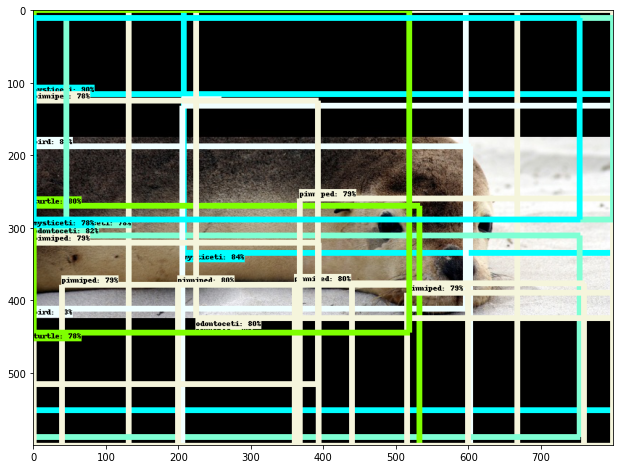

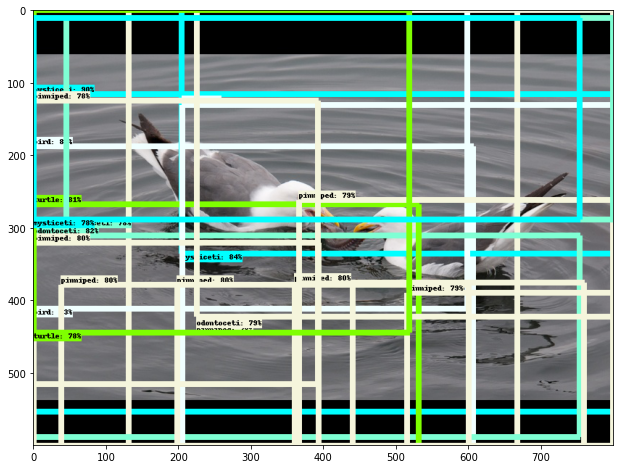

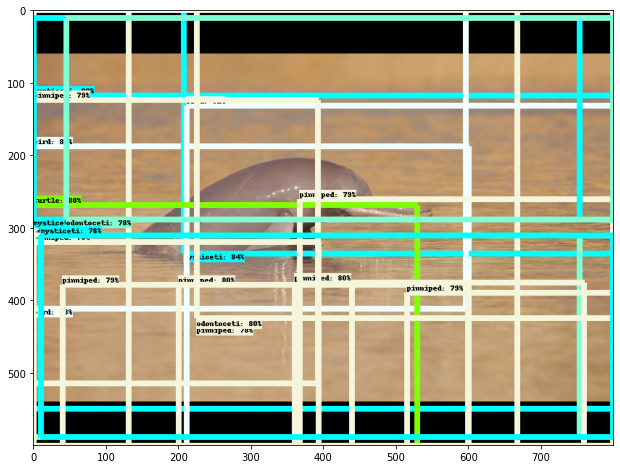

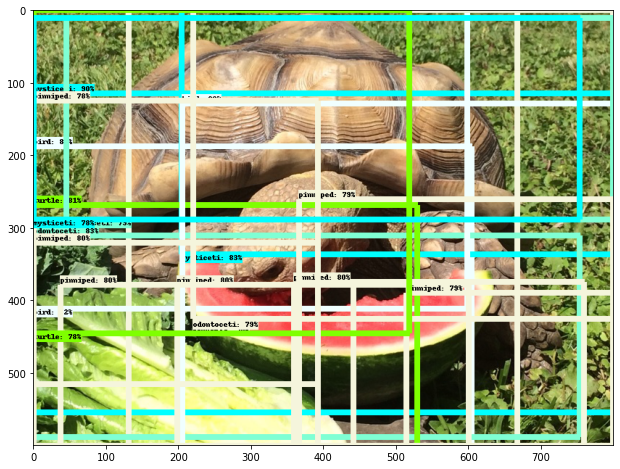

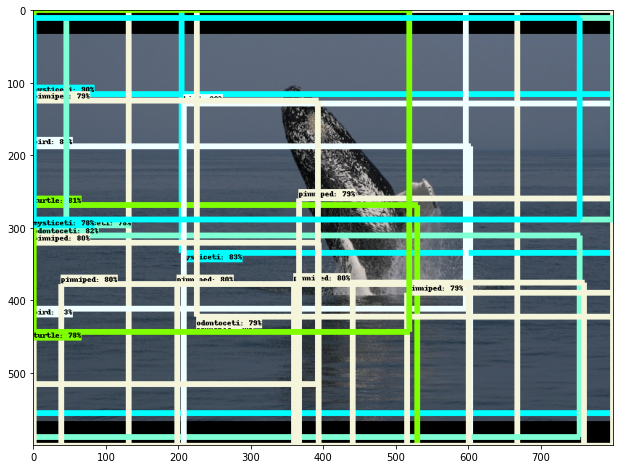

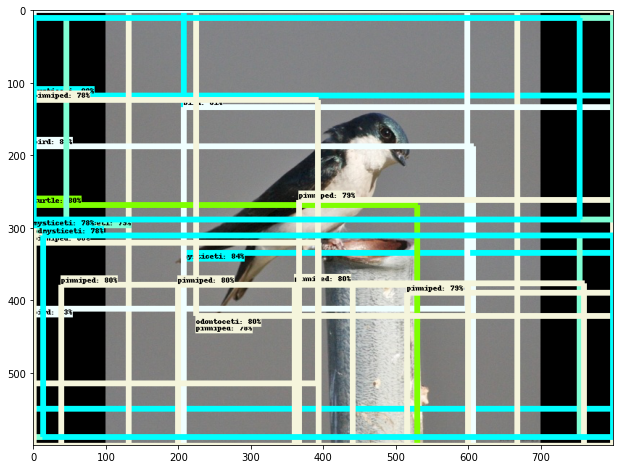

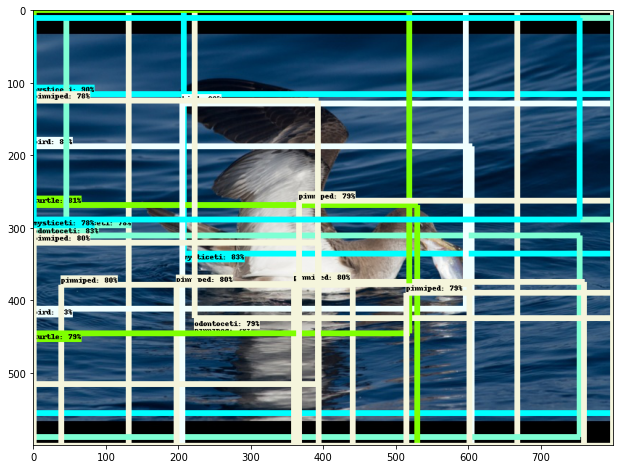

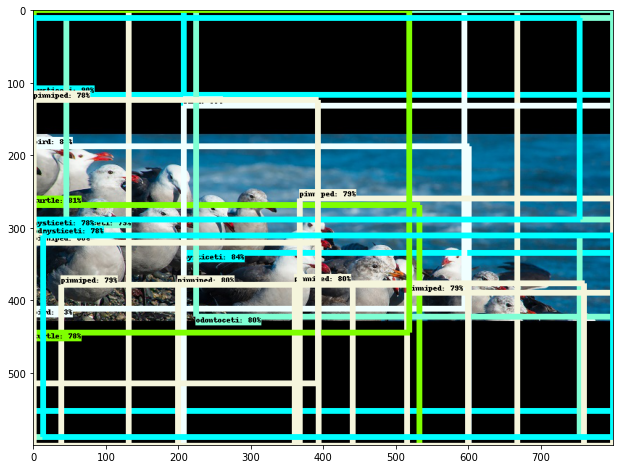

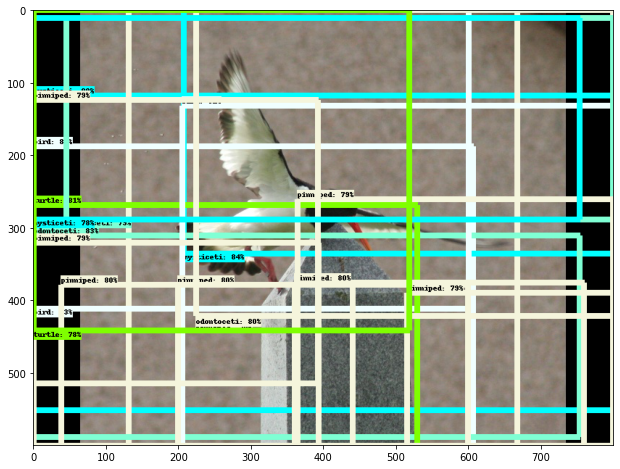

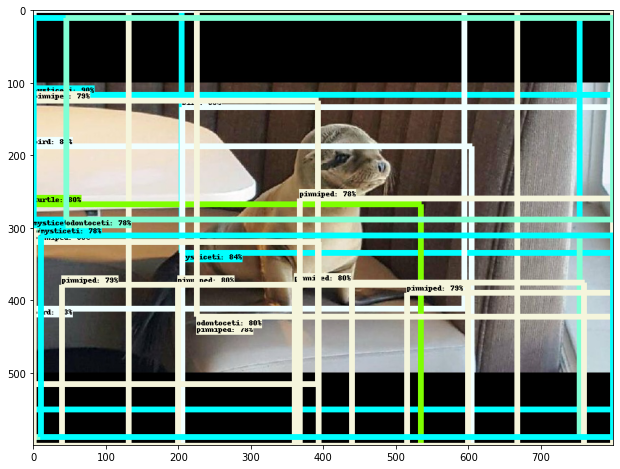

In [22]:
%matplotlib inline
import numpy as np
from numpy.random import choice

idx = choice(30, 10, replace=False)

for image_path in np.array(TEST_IMAGE_PATHS)[idx]:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)